# Apply NLP (Natural Language Processing) to detect spam for text messages 
## Introduction of NLP
- Natural Language Processing (or Text Analytics/Text Mining) applies analytic tools to learn from collections of text data, like social media, books, newspapers, emails, etc.
- Required to install NLTK (Natural Language Toolkit)


## Purpose
Train a machine learning model to learn to discriminate between ham/spam automatically and be able to classify arbitrary unlabeled messages as ham or spam.

## Functionality
1. Utilize unigram bag-of-words (BoW) model to convert a text format input/corpus to vectors of word counts which can be used for machine learning algorithms 
  - Text preprocessing - Define function text_process to convert the messages to a list of tokens 
    - Remove punctuations and stopwords and apply nltk.PorterStemmer.
    - Return list of clearned words/tokens/vocabularies/features/terms. 
  - Vectorization - Apply CountVectorizer from sklearn to convert lists of tokens from messages into vectors of word counts 
    - Invoke function text_process to build vocabulary of known words.
    - Encode new documents using that vocabulary.       
    - Convert messages(sequence of characters) into vectors (sequences of numbers).
    - Counting the occurrences of tokens and building a 2-dimensions sparse matrix of token counts.
      - With one row per word from the entire vocabulary and one column per message from the text file.
    - Create a Bag-of-Words (BoW) transformed object.   
  - Implementing TF-IDF transformations to weight and normalize words/terms
    - Apply TfidfTransformer from sklearn to  transform the BoW corpus into TF-IDF corpus.   
    - Terms Frequency (TF) is a score to measure the frequency of the term/word in the current document.
       - TF is a Normization to weight document equaly 
       - TF(d,t) = Number of occurances of term t in document d
    - IDF (Inverse Document Frequency) is a scm t in documentore to measure the importantance of a term/word across documents
      - The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.
      - Inverse document frequency is the weight to determine the term’s importance.   
      - IDF(t) = log(D/t)
        - D =  Total number of documents
        - t =  Number of documents with the term 
    - TF-IDF score : Term Frequency times Inverse Document Frequency
      - TF-IDF(d, t) score =   TF(d,t) * IDF(t)

   
2. Modeling   
  - Split the transformed TF-IDF file into train and test set
  - Apply Naive Bayes algorithm MultinomialNB and svm.LinearSVC to build model 
  - Apply classification_report to evaluate the model
  - Store a pipeline of workflow.

  
## Input
The input file SMSSpamCollection is a TSV ("tab separated values") file from https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection which contains 5572 SMS text messages with 4825 messages been classfied as 'ham' and 747 messages been classfied as 'spam'.

Data Dictionary:
 - label   : With value of 'ham' and 'spam'
 - message : Text message
 


## Import packages/libraries

In [1]:
from sklearn.model_selection  import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

from sklearn.pipeline import Pipeline

#Algorithm related library/Package
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB


import string
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# NLP related library/Package
import nltk
from nltk.corpus import stopwords  # Corpus - A collection of texts
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer

# nltk.download("stopwords")  # only need to download once

## Define function to remove all punctuation, stopwords and nltk.PorterStemmer
 -  Stopwords :  These short, less useful words are stop words
    -  Glue words that don’t mean much to a computer , e.g. as a, as, the, etc
    -  Can act as a means of stopping sentence analysis
    -  Required to invoke stopwords.words('english') in NLTK to get a list of stopword for 'ebglish'
       - use the list to remove stopword from input for text analysis
    - Exceute one of the followings before invoking the function
       - nltk.download('stopwords')
       - nltk.download() 
         - Download the necessary datasets
           - It would take a while to download
    - string.punctuation :  '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'      
 - Return a list of cleaned words
 
  

In [16]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
       - string.punctuation: string of punctuation, e.g.
         - '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    2. Splitted the words and remove all stopwords
       - stopwords.words('english')) returns a list of stopwords in English, e.g.
         ['i',  'me', 'my', 'myself', 'we',  .... , 'wouldn',  "wouldn't"]
    3. porter = nltk.PorterStemmer()
    4. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Apply PorterStemmer for words not in  stopwords
    return [porter.stem(word) for word in nopunc.split() if word not in stopwords.words('english')]

### Read input file

In [3]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',    names=["label", "message"])

### Exploratory Data Analysis

In [4]:
messages.head()

label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [5]:
messages.shape

(5572, 2)

In [6]:
messages.describe()

label                 message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30

In [7]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [8]:
messages['length'] = messages['message'].apply(len)  # Add new feature

### Data Visualization

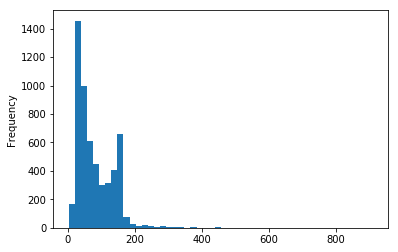

In [9]:
messages['length'].plot(bins=50, kind='hist')

In [10]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [11]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026BC6B9CC18>,
      dtype=object)

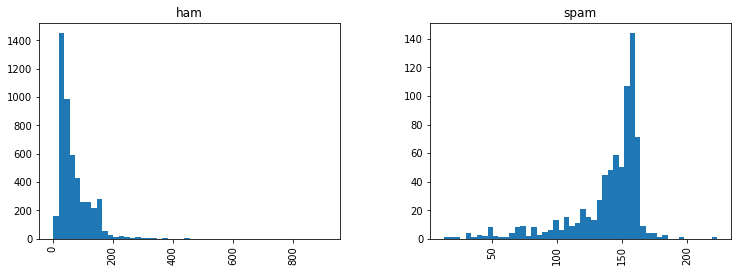

In [12]:
# the spam messages tend to have more characters.
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

### Text Pre-processing

## Vectorization
- Apply the bag-of-words model:
  1. Count how many times does a word occur in each message (Known as term frequency:TF)
  2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency:IDF)
  3. Get score of term by calculating TF * IDF
- Use use SciKit Learn's CountVectorizer to convert a collection of text documents to a matrix of token counts.  
  - Use the function text_process as the analyzer  
    - analyzer: A callable that replaces the preprocessor and tokenizer. N-gram extraction and stop word filtering take place at the analyzer level.  

In [17]:
porter = nltk.PorterStemmer()
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [18]:
print(len(bow_transformer.vocabulary_))

8424


In [21]:
# The converse mapping from feature name to column index is stored in the vocabulary_ attribute of the vectorizer:
bow_transformer.vocabulary_['go']  # same as  bow_transformer.vocabulary_.get('go')

3522

In [24]:
 print(bow_transformer.get_feature_names()[3522])

go


In [25]:
messages_bow = bow_transformer.transform(messages['message'])  # type : scipy.sparse.csr.csr_matrix

In [26]:
print('Shape of Sparse Matrix: ', messages_bow.shape)  # length of messages = 5572, length of vacaburary = 8424 

Shape of Sparse Matrix:  (5572, 8424)


In [28]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [29]:
# Split train and test set
msg_train, msg_test, label_train, label_test = train_test_split (messages_tfidf, messages['label'], test_size = 0.2 , random_state = 40, 
                                                                 stratify = messages['label']  ) 

In [30]:
detect_spam_model = MultinomialNB().fit(msg_train,  label_train)
predict_all = detect_spam_model.predict(msg_test)
print (classification_report(label_test, predict_all))   

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       1.00      0.71      0.83       149

   micro avg       0.96      0.96      0.96      1115
   macro avg       0.98      0.86      0.90      1115
weighted avg       0.96      0.96      0.96      1115



In [32]:
# The hinge loss is a loss function used for training classifiers. The hinge loss is used for "maximum-margin" 
# classification, most notably for support vector machines (SVMs)
clf = svm.LinearSVC(loss = 'hinge')
clf.fit(msg_train,  label_train)
clf_predict = clf.predict(msg_test)
print (classification_report(label_test, clf_predict))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       0.98      0.90      0.94       149

   micro avg       0.98      0.98      0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

